W = tensor([[0.2187]], requires_grad=True), b = tensor([[-6.8682]], requires_grad=True), loss = tensor(1.1444, grad_fn=<MeanBackward0>)


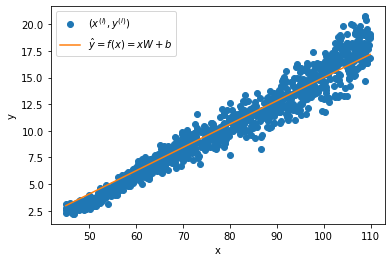

tensor([[ 4.0687],
        [10.6309],
        [15.0057]], grad_fn=<AddBackward0>)


In [ ]:
import torch
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('length_weight.csv', names=["Length", "Weight"])

x_train = torch.tensor([data.Length.to_list()]).reshape(-1, 1)
y_train = torch.tensor([data.Weight.to_list()]).reshape(-1, 1)

class LinearRegressionModel:
    def __init__(self):
        # Model variables
        self.W = torch.tensor([[0.0]], requires_grad=True)  # requires_grad enables calculation of gradients
        self.b = torch.tensor([[0.0]], requires_grad=True)

    # Predictor
    def f(self, x):
        return x @ self.W + self.b  # @ corresponds to matrix multiplication

    # Uses Mean Squared Error
    def loss(self, x, y):
        return torch.mean(torch.square(self.f(x) - y))  # Can also use torch.nn.functional.mse_loss(self.f(x), y) to possibly increase numberical stability


model = LinearRegressionModel()

# Optimize: adjust W and b to minimize loss using stochastic gradient descent
optimizer = torch.optim.SGD([model.W, model.b], 0.00015)
for epoch in range(100000):
    model.loss(x_train, y_train).backward()  # Compute loss gradients
    optimizer.step()  # Perform optimization by adjusting W and b,

    optimizer.zero_grad()  # Clear gradients for next step

# Print model variables and loss
print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(x_train, y_train)))

# Visualize result
plt.plot(x_train, y_train, 'o', label='$(x^{(i)},y^{(i)})$')
plt.xlabel('x')
plt.ylabel('y')
x = torch.tensor([[torch.min(x_train)], [torch.max(x_train)]])
plt.plot(x, model.f(x).detach(), label='$\\hat y = f(x) = xW+b$')
plt.legend()
plt.show()

print(model.f(torch.tensor([[50.0], [80.0], [100.0]])))


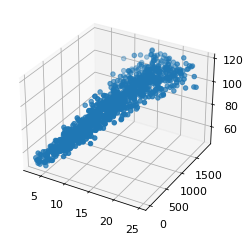

In [1]:
import torch
# import matplotlib.pyplot as plt
import pandas as pd


import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 11})

W_init = np.array([[-0.2], [0.53]])
b_init = np.array([[3.1]])


class LinearRegressionModel:
    def __init__(self, W=W_init.copy(), b=b_init.copy()):
        self.W = W
        self.b = b

    # predictor
    def f(self, x):
        return x @ self.W + self.b

    # Uses Mean Squared Error
    def loss(self, x, y):
        return np.mean(np.power(self.f(x) - y, 2))


model = LinearRegressionModel()

# # Optimize: adjust W and b to minimize loss using stochastic gradient descent
# optimizer = torch.optim.SGD([model.W, model.b], 0.00015)
# for epoch in range(100000):
#     model.loss(x_train, y_train).backward()  # Compute loss gradients
#     optimizer.step()  # Perform optimization by adjusting W and b,

#     optimizer.zero_grad()  # Clear gradients for next step

# # Print model variables and loss
# print("W = %s, b = %s, loss = %s" % (model.W, model.b, model.loss(x_train, y_train)))

data = pd.read_csv('age_length_weight.csv', names=["Age", "Length", "Weight"])


x = []
length = data.Length.to_list()
weight = data.Weight.to_list()
age = data.Age.to_list()
for i in range(len(length)):
    x.append([length[i], weight[i]])

fig = plt.figure('Linear regression: 3D')

plot1 = fig.add_subplot(111, projection='3d')

plot1.scatter(weight, age, length)

plt.show()
